# Modelo LSTM para prever dados de ações
Prof. Fernando Amaral

In [1]:
#GPU
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_parquet('../../Dados/all_stocks_5yr.parquet')

In [6]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [7]:
companies = df.Name.unique()
companies

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [8]:
#Zoetis Inc
z = df.loc[df['Name'] == 'ZTS']
z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 617781 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [9]:
z.head()

,date,open,high,low,close,volume,Name
617781,2013-02-08,32.31,33.48,32.30,33.05,2599232,ZTS
617782,2013-02-11,33.06,33.50,32.88,33.26,1486115,ZTS
617783,2013-02-12,33.40,34.00,33.15,33.74,1637279,ZTS
617784,2013-02-13,33.80,33.80,33.00,33.55,1269625,ZTS
617785,2013-02-14,33.39,33.45,32.77,33.27,2954324,ZTS


In [10]:
trainingd = z.iloc[:, 4:5].values

In [11]:
trainingd

array([[33.05],
       [33.26],
       [33.74],
       ...,
       [73.83],
       [73.27],
       [73.86]])

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(trainingd)

In [13]:
#array de 3 dimensões esparado pelo lstm
#linhas
#sequencia: 45
#features: 1
x_train = []
y_train = []
timestamp = 45
length = len(trainingd)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1214, 45, 1)

In [15]:
model = Sequential()
model.add(LSTM(units = 120, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
model.fit(x_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
38/38 [==============================] - 19s 204ms/step - loss: 0.0220
Epoch 2/25
38/38 [==============================] - 7s 196ms/step - loss: 0.0024
Epoch 3/25
38/38 [==============================] - 8s 223ms/step - loss: 0.0022
Epoch 4/25
38/38 [==============================] - 9s 229ms/step - loss: 0.0021
Epoch 5/25
38/38 [==============================] - 8s 209ms/step - loss: 0.0019
Epoch 6/25
38/38 [==============================] - 8s 205ms/step - loss: 0.0018
Epoch 7/25
38/38 [==============================] - 7s 188ms/step - loss: 0.0018
Epoch 8/25
38/38 [==============================] - 7s 189ms/step - loss: 0.0016
Epoch 9/25
38/38 [==============================] - 6s 169ms/step - loss: 0.0017
Epoch 10/25
38/38 [==============================] - 7s 174ms/step - loss: 0.0016
Epoch 11/25
38/38 [==============================] - 7s 176ms/step - loss: 0.0015
Epoch 12/25
38/38 [==============================] - 8s 199ms/step - loss: 0.0020
Epoch 13/25
38/38 [=====

In [17]:
#vamos testar com outra empresa Boeing
test_set = df.loc[df['Name'] == 'BA']
test_set = test_set.loc[:, test_set.columns=='close']

In [18]:
y_test = test_set.iloc[timestamp:,0:].values

In [19]:
closing_price = test_set.iloc[:,0:].values
closing_price_scaled = sc.transform(closing_price)

In [20]:
x_test = []
length = len(test_set)

for i in range(timestamp, length):
    x_test.append(closing_price_scaled[i-timestamp:i,0])

x_test = np.array(x_test)
x_test.shape

(1214, 45)

In [21]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(1214, 45, 1)

In [22]:
y_pred = model.predict(x_test)
predicted_price = sc.inverse_transform(y_pred)

38/38 [==============================] - 3s 32ms/step


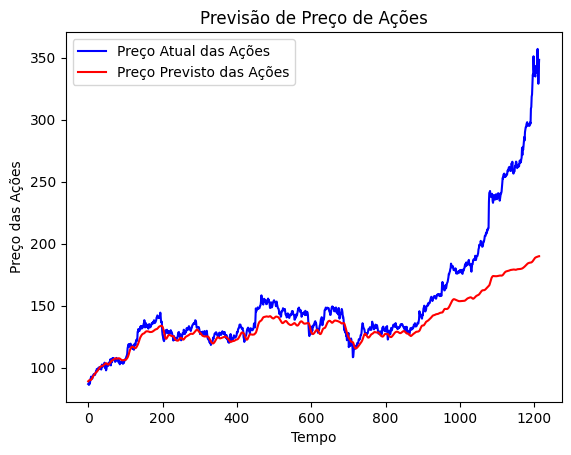

In [23]:
plt.plot(y_test, color='blue', label='Preço Atual das Ações')
plt.plot(predicted_price, color='red', label='Preço Previsto das Ações')
plt.title('Previsão de Preço de Ações')
plt.xlabel('Tempo')
plt.ylabel('Preço das Ações')
plt.legend()
plt.show()